In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


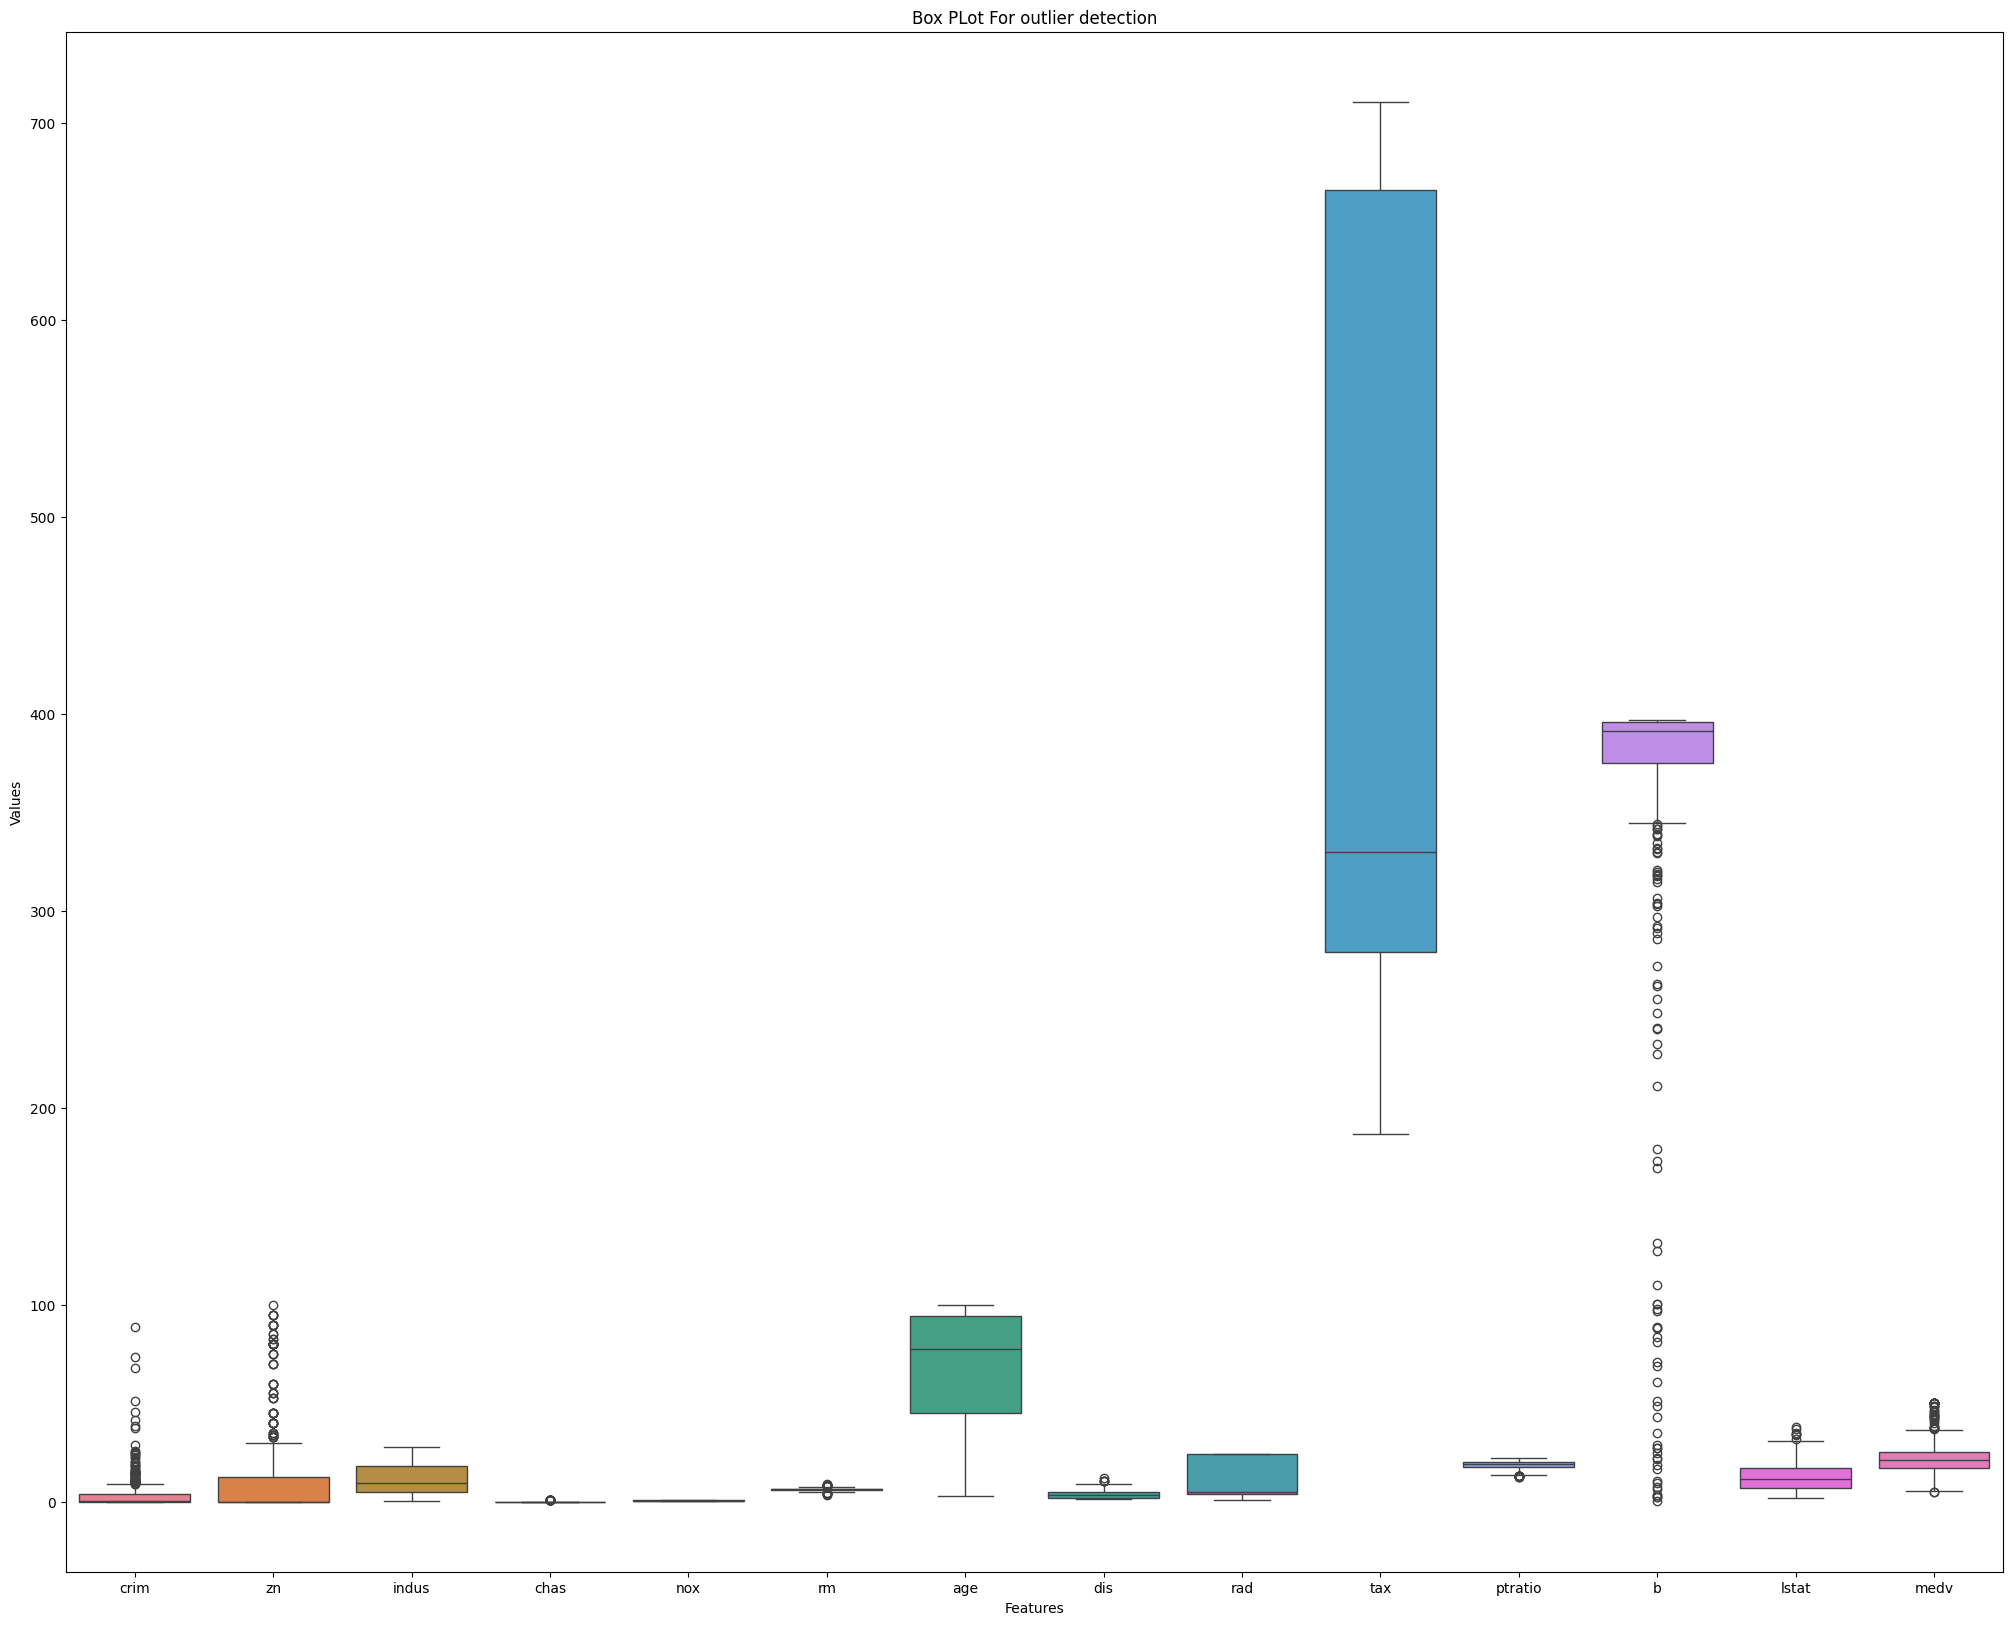

In [ ]:
#plot boxplot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25,20))
sns.boxplot(data=df)
plt.title('Box PLot For outlier detection')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [ ]:
def detect_outlier_IQR(df):
  Q1=df.quantile(0.25),
  Q3=df.quantile(0.75),
  IQR=Q3-Q1
print(IQR)
lower_bound=Q1-1.5*IQR
print(lower_bound)
upper_bound=Q3+1.5*IQR
print(upper_bound)


crim         3.595038
zn          12.500000
indus       12.910000
chas         0.000000
nox          0.175000
rm           0.738000
age         49.050000
dis          3.088250
rad         20.000000
tax        387.000000
ptratio      2.800000
b           20.847500
lstat       10.005000
medv         7.975000
dtype: float64
crim        -5.310511
zn         -18.750000
indus      -14.175000
chas         0.000000
nox          0.186500
rm           4.778500
age        -28.550000
dis         -2.532200
rad        -26.000000
tax       -301.500000
ptratio     13.200000
b          344.106250
lstat       -8.057500
medv         5.062500
dtype: float64
crim          9.069639
zn           31.250000
indus        37.465000
chas          0.000000
nox           0.886500
rm            7.730500
age         167.650000
dis           9.820800
rad          54.000000
tax        1246.500000
ptratio      24.400000
b           427.496250
lstat        31.962500
medv         36.962500
dtype: float64


In [ ]:
outlier = ((df<lower_bound) | (df>upper_bound)).sum()
print(outlier)


crim       66
zn         68
indus       0
chas       35
nox         0
rm         30
age         0
dis         5
rad         0
tax         0
ptratio    15
b          77
lstat       7
medv       40
dtype: int64


In [ ]:
#no of outliers
print(outlier.sum())


343


In [ ]:
def detect_outlier_IQR(df):
  Q1=df.quantile(0.25)
  Q3=df.quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  outlier = ((df<lower_bound) | (df>upper_bound))
  return outlier

outlier_mask=df.apply(detect_outlier_IQR)
print(outlier_mask)




      crim     zn  indus   chas    nox     rm    age    dis    rad    tax  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     ptratio      b  lstat   medv  
0      False  False  False  False  
1  

In [ ]:
for column in df.columns:
  median_value=df[column].median()
median_value

21.2

In [ ]:
#replace outlier with median
for column in df.columns:
  median_value=df[column].median()
  df.loc[outlier_mask[column],column]=median_value
print("\nOutliers have been replaced with median values")


Outliers have been replaced with median values
